In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
import os
from tqdm import tqdm  # Versión estándar para evitar errores de widgets
import matplotlib.pyplot as plt

# Configuración de Hardware
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Configuración de rutas inteligentes
# Buscamos el archivo .pt en la raíz o una carpeta atrás
posibles_datos = ["data/processed/RML2016_limpio.pt", "../data/processed/RML2016_limpio.pt"]
PATH_PROCESSED = next((f for f in posibles_datos if os.path.exists(f)), None)

if PATH_PROCESSED:
    print(f"🚀 Entrenando en: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")
    print(f"📦 Datos encontrados en: {PATH_PROCESSED}")
else:
    print("❌ ERROR: No se encontró 'RML2016_limpio.pt'. Revisa la carpeta data/processed/")

🚀 Entrenando en: NVIDIA GeForce RTX 4060
📦 Datos encontrados en: ../data/processed/RML2016_limpio.pt


In [24]:
# 1. Cargar tensores
checkpoint = torch.load(PATH_PROCESSED)
X, lbl, mods = checkpoint['X'], checkpoint['lbl'], checkpoint['mods']

# 2. Dataset y Loaders
full_dataset = TensorDataset(X, lbl)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_ds, test_ds = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=1024, shuffle=False)

# 3. Arquitectura de la Red
class SignalClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SignalClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=(1, 7), padding=(0, 3))
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 64, kernel_size=(2, 7), padding=(0, 3))
        self.bn2 = nn.BatchNorm2d(64)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 128, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

print(f"✅ Listo para clasificar {len(mods)} clases.")

✅ Listo para clasificar 10 clases.


In [25]:
# Inicialización
EPOCHS = 60 # Cambia a 3 para pruebas rápidas o 60 para entrenamiento real
model = SignalClassifier(num_classes=len(mods)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_history = []

print("🔥 Iniciando entrenamiento...")

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")
    
    for signals, labels in pbar:
        signals, labels = signals.to(device), labels.to(device)
        
        optimizer.zero_grad()
        loss = criterion(model(signals), labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        pbar.set_postfix(loss=f"{total_loss/len(train_loader):.4f}")
    
    avg_loss = total_loss / len(train_loader)
    loss_history.append(avg_loss)
    
    if (epoch + 1) % 5 == 0:
        print(f"🚩 Época {epoch+1} finalizada - Loss: {avg_loss:.4f}")

print("🎉 ¡Entrenamiento completado!")

🔥 Iniciando entrenamiento...


Epoch 5/60: 100%|██████████| 79/79 [00:02<00:00, 26.74it/s, loss=0.3851]


🚩 Época 5 finalizada - Loss: 0.3851


Epoch 10/60: 100%|██████████| 79/79 [00:02<00:00, 26.91it/s, loss=0.3468]


🚩 Época 10 finalizada - Loss: 0.3468


Epoch 15/60: 100%|██████████| 79/79 [00:02<00:00, 28.02it/s, loss=0.3252]


🚩 Época 15 finalizada - Loss: 0.3252


Epoch 20/60: 100%|██████████| 79/79 [00:02<00:00, 27.90it/s, loss=0.3026]


🚩 Época 20 finalizada - Loss: 0.3026


Epoch 25/60: 100%|██████████| 79/79 [00:02<00:00, 28.10it/s, loss=0.2972]


🚩 Época 25 finalizada - Loss: 0.2972


Epoch 30/60: 100%|██████████| 79/79 [00:02<00:00, 27.95it/s, loss=0.2736]


🚩 Época 30 finalizada - Loss: 0.2736


Epoch 35/60: 100%|██████████| 79/79 [00:02<00:00, 27.96it/s, loss=0.2610]


🚩 Época 35 finalizada - Loss: 0.2610


Epoch 40/60: 100%|██████████| 79/79 [00:02<00:00, 27.95it/s, loss=0.2491]


🚩 Época 40 finalizada - Loss: 0.2491


Epoch 45/60: 100%|██████████| 79/79 [00:02<00:00, 27.82it/s, loss=0.2353]


🚩 Época 45 finalizada - Loss: 0.2353


Epoch 50/60: 100%|██████████| 79/79 [00:02<00:00, 27.89it/s, loss=0.2374]


🚩 Época 50 finalizada - Loss: 0.2374


Epoch 55/60: 100%|██████████| 79/79 [00:02<00:00, 27.75it/s, loss=0.2277]


🚩 Época 55 finalizada - Loss: 0.2277


Epoch 60/60: 100%|██████████| 79/79 [00:02<00:00, 28.06it/s, loss=0.2112]

🚩 Época 60 finalizada - Loss: 0.2112
🎉 ¡Entrenamiento completado!


💾 Modelo guardado en: c:\Users\ivanb\OneDrive\Desktop\proyectos\ia_vision\models\signal_model_v3.pth
📊 Gráfica guardada en: c:\Users\ivanb\OneDrive\Desktop\proyectos\ia_vision\img\curva_aprendizaje_v3.png


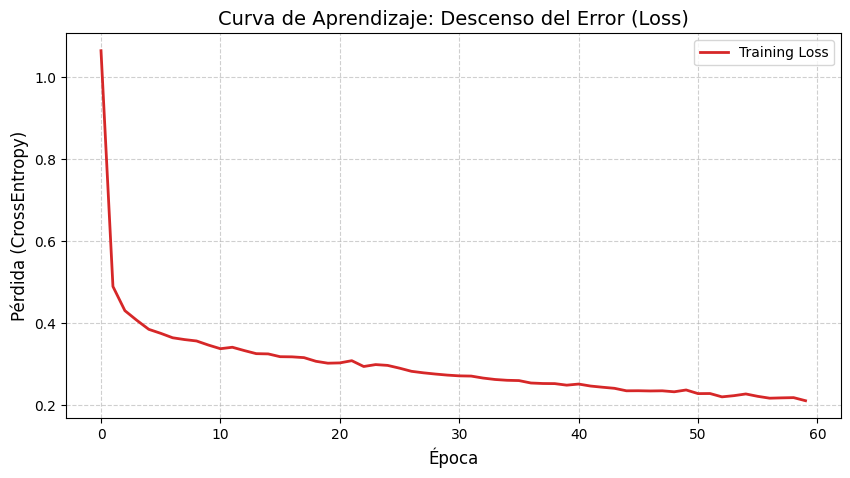

In [27]:
# --- 1. Configuración de carpetas ---
# Salimos de notebooks/ para ir a la raíz
MODEL_DIR = "../models" if "notebooks" in os.getcwd() else "models"
IMG_DIR = "../img" if "notebooks" in os.getcwd() else "img"

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(IMG_DIR, exist_ok=True)

# --- 2. Guardar el modelo ---
MODEL_PATH = os.path.join(MODEL_DIR, "signal_model_v3.pth")
torch.save(model.state_dict(), MODEL_PATH)
print(f"💾 Modelo guardado en: {os.path.abspath(MODEL_PATH)}")

# --- 3. Graficar y Guardar Curva de Aprendizaje ---
plt.figure(figsize=(10, 5))
plt.plot(loss_history, color='tab:red', linewidth=2, label='Training Loss')
plt.title('Curva de Aprendizaje: Descenso del Error (Loss)', fontsize=14)
plt.xlabel('Época', fontsize=12)
plt.ylabel('Pérdida (CrossEntropy)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Definir ruta de la imagen
CURVA_PATH = os.path.join(IMG_DIR, "curva_aprendizaje_v3.png")

# Guardar la gráfica antes de mostrarla
plt.savefig(CURVA_PATH, dpi=300, bbox_inches='tight')
print(f"📊 Gráfica guardada en: {os.path.abspath(CURVA_PATH)}")

plt.show()